<div align="center">

# <span style="color:green"> <ins> Analysis of Titanic Dataset <ins></span>

<div align="center" width="50">
    <br>
    <br>
    <br>

</div>

In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
pd.pandas.set_option('display.max_columns',None)
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from lightgbm import LGBMRegressor
from sklearn.preprocessing import StandardScaler
from xgboost import XGBRegressor
import sklearn.metrics as metrics
import math
import sklearn

In [41]:
orgnl_train= pd.read_csv("/home/dheeraj/my_projects/my_project_env/practice/EDA_and_prediction/EDA_Titanic_Dataset/train.csv")
orgnl_test = pd.read_csv("/home/dheeraj/my_projects/my_project_env/practice/EDA_and_prediction/EDA_Titanic_Dataset/test.csv")

In [42]:
df = orgnl_train.copy()
df.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S

# EDA

## Missing values

In [43]:
df.isnull()

PassengerId  Survived  Pclass   Name    Sex    Age  SibSp  Parch  Ticket  \
0          False     False   False  False  False  False  False  False   False   
1          False     False   False  False  False  False  False  False   False   
2          False     False   False  False  False  False  False  False   False   
3          False     False   False  False  False  False  False  False   False   
4          False     False   False  False  False  False  False  False   False   
..           ...       ...     ...    ...    ...    ...    ...    ...     ...   
886        False     False   False  False  False  False  False  False   False   
887        False     False   False  False  False  False  False  False   False   
888        False     False   False  False  False   True  False  False   False   
889        False     False   False  False  False  False  False  False   False   
890        False     False   False  False  False  False  False  False   False   

      Fare  Cabin  Embarked  
0    False   True     False  
1    False  False     False  
2    False   True     False  
3    False  False     False  
4    False   True     False  
..     ...    ...       ...  
886  False   True     False  
887  False  False     False  
888  False   True     False  
889  False  False     False  
890  False   True     False  

[891 rows x 12 columns]

In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


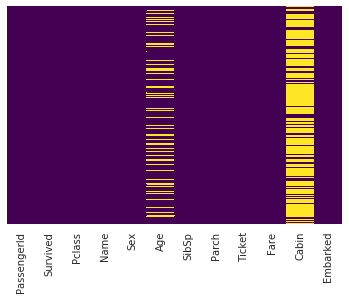

In [45]:
sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap='viridis')

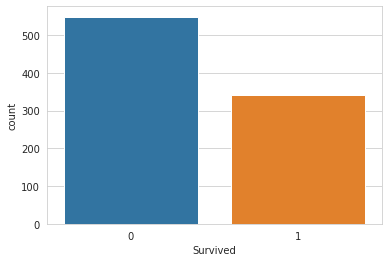

In [46]:
sns.set_style('whitegrid')
sns.countplot(df['Survived'])

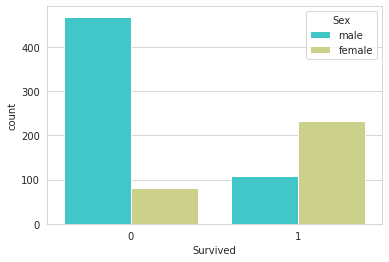

In [47]:
sns.set_style('whitegrid')
sns.countplot(df['Survived'], hue=df['Sex'], palette='rainbow')

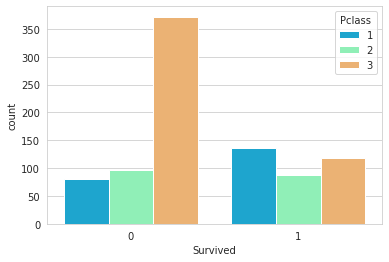

In [48]:
sns.set_style('whitegrid')
sns.countplot(df['Survived'], hue=df['Pclass'], palette='rainbow')

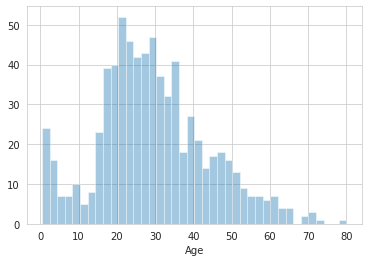

In [49]:
sns.distplot(df['Age'].dropna(), kde=False, bins=40)

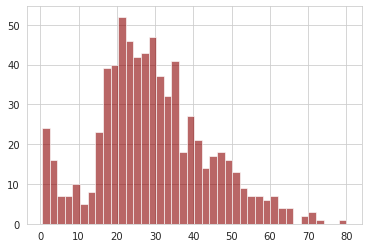

In [50]:
df['Age'].dropna().hist(bins=40, color='darkred', alpha=0.6)

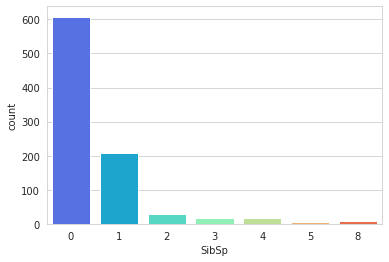

In [51]:
sns.set_style('whitegrid')
sns.countplot(df['SibSp'], palette='rainbow')

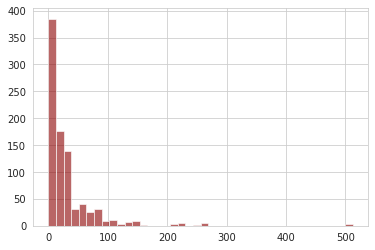

In [52]:
df['Fare'].dropna().hist(bins=40, color='darkred', alpha=0.6)

## Data Cleaning

In [53]:
df.corr()

PassengerId  Survived    Pclass       Age     SibSp     Parch  \
PassengerId     1.000000 -0.005007 -0.035144  0.036847 -0.057527 -0.001652   
Survived       -0.005007  1.000000 -0.338481 -0.077221 -0.035322  0.081629   
Pclass         -0.035144 -0.338481  1.000000 -0.369226  0.083081  0.018443   
Age             0.036847 -0.077221 -0.369226  1.000000 -0.308247 -0.189119   
SibSp          -0.057527 -0.035322  0.083081 -0.308247  1.000000  0.414838   
Parch          -0.001652  0.081629  0.018443 -0.189119  0.414838  1.000000   
Fare            0.012658  0.257307 -0.549500  0.096067  0.159651  0.216225   

                 Fare  
PassengerId  0.012658  
Survived     0.257307  
Pclass      -0.549500  
Age          0.096067  
SibSp        0.159651  
Parch        0.216225  
Fare         1.000000

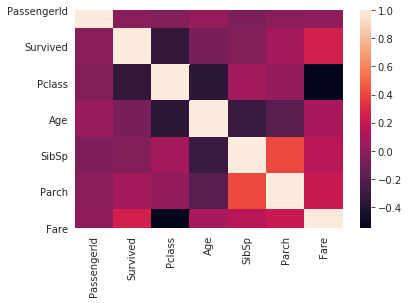

In [54]:
sns.heatmap(df.corr())

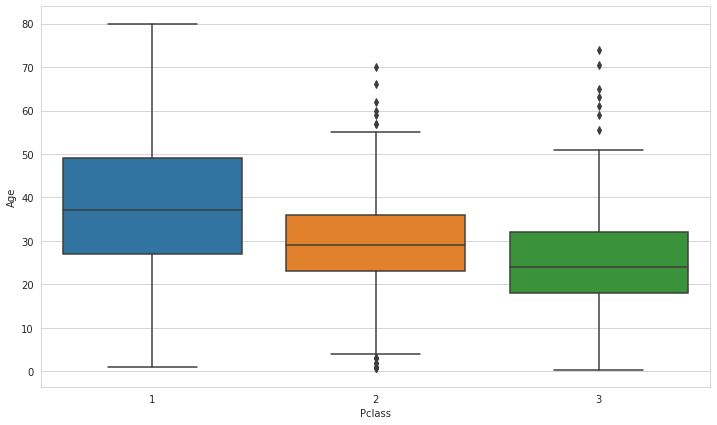

In [55]:
plt.figure(figsize=(12,7))
sns.boxplot(x=df['Pclass'], y = df['Age'])

In [56]:
def input_age(col):
    Age = col[0]
    Pclass = col[1]
    
    if pd.isnull(Age):
        if Pclass == 1:
            return 37
        
        if Pclass == 2:
            return 29
        
        else:
            return 24
    else:
        return Age

In [57]:
df['Age'] = df[['Age', 'Pclass']].apply(input_age, axis=1)

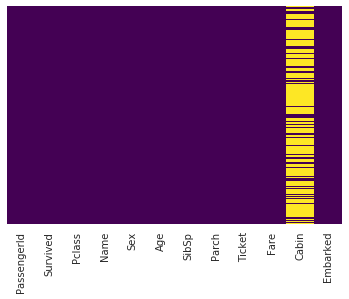

In [58]:
sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap='viridis')

In [59]:
df.drop('Cabin', axis=1, inplace=True)

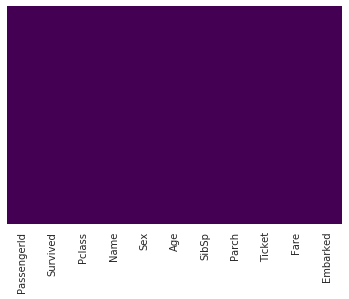

In [60]:
sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap='viridis')

In [61]:
df.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Embarked  
0      0         A/5 21171   7.2500        S  
1      0          PC 17599  71.2833        C  
2      0  STON/O2. 3101282   7.9250        S  
3      0            113803  53.1000        S  
4      0            373450   8.0500        S

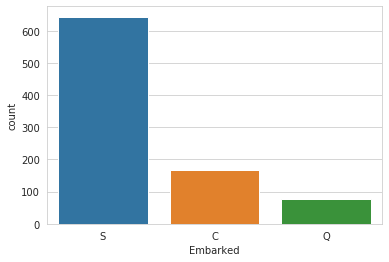

In [62]:
sns.countplot(df['Embarked'])

In [63]:
pd.get_dummies(df['Embarked'], drop_first=True).head()

Q  S
0  0  1
1  0  0
2  0  1
3  0  1
4  0  1

In [64]:
sex = pd.get_dummies(df['Sex'], drop_first=True)
embark = pd.get_dummies(df['Embarked'], drop_first=True)

In [65]:
sex.head()

male
0     1
1     0
2     0
3     0
4     1

In [66]:
df.drop(['Sex', 'Name', 'Ticket', 'Embarked'], axis=1, inplace=True)

In [67]:
df

PassengerId  Survived  Pclass   Age  SibSp  Parch     Fare
0              1         0       3  22.0      1      0   7.2500
1              2         1       1  38.0      1      0  71.2833
2              3         1       3  26.0      0      0   7.9250
3              4         1       1  35.0      1      0  53.1000
4              5         0       3  35.0      0      0   8.0500
..           ...       ...     ...   ...    ...    ...      ...
886          887         0       2  27.0      0      0  13.0000
887          888         1       1  19.0      0      0  30.0000
888          889         0       3  24.0      1      2  23.4500
889          890         1       1  26.0      0      0  30.0000
890          891         0       3  32.0      0      0   7.7500

[891 rows x 7 columns]

In [68]:
df = pd.concat([df, sex, embark], axis =1)

In [69]:
df.head()

PassengerId  Survived  Pclass   Age  SibSp  Parch     Fare  male  Q  S
0            1         0       3  22.0      1      0   7.2500     1  0  1
1            2         1       1  38.0      1      0  71.2833     0  0  0
2            3         1       3  26.0      0      0   7.9250     0  0  1
3            4         1       1  35.0      1      0  53.1000     0  0  1
4            5         0       3  35.0      0      0   8.0500     1  0  1

In [70]:
scaler = StandardScaler()
df[['Age', 'Fare']]= scaler.fit_transform(df[['Age', 'Fare']])
df.head()

PassengerId  Survived  Pclass       Age  SibSp  Parch      Fare  male  Q  S
0            1         0       3 -0.533834      1      0 -0.502445     1  0  1
1            2         1       1  0.674891      1      0  0.786845     0  0  0
2            3         1       3 -0.231653      0      0 -0.488854     0  0  1
3            4         1       1  0.448255      1      0  0.420730     0  0  1
4            5         0       3  0.448255      0      0 -0.486337     1  0  1

## Train test split

In [71]:
y = df['Survived']

In [72]:
df.drop(['Survived', 'PassengerId'], axis=1, inplace=True)

In [73]:
df.head()

Pclass       Age  SibSp  Parch      Fare  male  Q  S
0       3 -0.533834      1      0 -0.502445     1  0  1
1       1  0.674891      1      0  0.786845     0  0  0
2       3 -0.231653      0      0 -0.488854     0  0  1
3       1  0.448255      1      0  0.420730     0  0  1
4       3  0.448255      0      0 -0.486337     1  0  1

In [84]:
from sklearn.linear_model import LogisticRegression
import sklearn.metrics as metrics

In [85]:
x_train, x_test ,y_train, y_test  = train_test_split(df, y, test_size=0.20, random_state=101 )

## Logistic Regression

In [86]:
model = LogisticRegression()
model.fit(x_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [87]:
prediction = model.predict(x_test)

In [88]:
print('RMSE = ' + str(math.sqrt(metrics.mean_squared_error(y_test, prediction))))          ## print the error 

RMSE = 0.43582580703557733


In [89]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

In [90]:
con_mat = confusion_matrix(y_test, prediction)

In [91]:
con_mat

array([[86, 13],
       [21, 59]])

In [92]:
accuracy = accuracy_score(y_test, prediction)
accuracy

0.8100558659217877